# **Description of the Dataset:**

* **Number of Samples:** 200

* **Number of Features:**  11 features + 1 target variable

* T**arget Variable:** Binary class

# **Features:**

* **Height (cm):** Normally distributed, representing height in centimeters.
* **Weight (kg):**  Normally distributed, representing weight in kilograms.
* **Temperature (C):**  Body temperature in Celsius.
* **Age (years):**  Random ages between 18 and 70 years.
* **Blood Pressure (mmHg):**  Represents systolic blood pressure.
* **Cholesterol (mg/dL):**Represents cholesterol levels.
* **Heart Rate (bpm):**  Heart rate in beats per minute (bpm).
* **Blood Sugar (mg/dL):** Blood sugar levels. .
* **Exercise Time (min):**  Time spent exercising in minutes.
* **Sleep Duration (hours):** Tells persons gender
* **Target:** '0' person is  not at a risk of diabeties and "1" person is at risk of diabeties.





**TASK 0:**
Print your student id, full and name below.

**Expected answer**

st12xxxx

Firstname Lastname

In [ ]:
# Your Code
print("st125457", "Ulugbek Shernazarov", sep='\n')

st125457
Ulugbek Shernazarov


# **1. Load The dataset**
Read the CSV file that you downloaded and display the first 5 rows of the datasets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Your Code
df = pd.read_csv('Dataset.csv')
df.head()

,Height (cm),Weight (kg),Temperature (C),Age (years),Blood Pressure (mmHg),Cholesterol (mg/dL),Heart Rate (bpm),Blood Sugar (mg/dL),Exercise Time (min),Sleep Duration (hours),Target,Gender
0,error cm,89.23148381437832 kg,37.189712,24.0,125.64861022708700,212.59183753118100,76.287906,83.246000,33.782510,NaN,0,3
1,158.76098533134908 cm,71.7530407351167 kg,37.901611,43.0,132.1478676245550,154.1557654140720,68.588921,104.848168,12.208962,6.258468,0,4
2,158.582359074842 cm,74.75413925518244 kg,34.926579,57.0,110.25912459384400,183.2134502540140,70.335309,62.389718,39.126631,5.123956,0,2
3,175.35577446888428 cm,98.51403419491862 kg,36.570948,22.0,131.58142183462900,160.52773198795100,74.118787,113.099261,40.714784,NaN,0,4
4,170.4866873688305 cm,NaN,NaN,38.0,136.67367985698000,221.67448587242600,63.044439,77.443121,27.420781,3.902564,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Height (cm)             183 non-null    object 
 1   Weight (kg)             181 non-null    object 
 2   Temperature (C)         180 non-null    float64
 3   Age (years)             180 non-null    float64
 4   Blood Pressure (mmHg)   181 non-null    object 
 5   Cholesterol (mg/dL)     180 non-null    object 
 6   Heart Rate (bpm)        180 non-null    float64
 7   Blood Sugar (mg/dL)     180 non-null    float64
 8   Exercise Time (min)     180 non-null    float64
 9   Sleep Duration (hours)  180 non-null    float64
 10  Target                  200 non-null    int64  
 11  Gender                  200 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 18.9+ KB


So, we have 4 object data types (that are actually in float) need to convert them into float ((height, weight) - requires string handling (remove cv,kg), and (blood pressure, cholesterol) - just transfer to float).

In [ ]:
df.describe()

,Temperature (C),Age (years),Heart Rate (bpm),Blood Sugar (mg/dL),Exercise Time (min),Sleep Duration (hours),Target,Gender
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,200.000000,200.000000
mean,37.083933,43.811111,70.999920,87.852514,32.072370,6.961663,0.100000,2.000000
std,1.007219,15.712070,9.130652,24.378277,15.291783,1.603707,0.300753,1.417762
min,34.409454,18.000000,48.780436,23.391692,-3.843749,3.038653,0.000000,0.000000
25%,36.332251,31.000000,64.853277,73.840678,20.627202,5.944631,0.000000,1.000000
50%,37.150775,43.500000,70.418371,86.105150,31.977837,7.011757,0.000000,2.000000
75%,37.790396,57.000000,77.233495,104.629126,43.583195,7.872260,0.000000,3.000000
max,40.495878,69.000000,98.846742,148.755145,71.489694,10.967555,1.000000,4.000000


# **2. Data Cleaning and Preprocessing (10 Marks)**

**Objective:** Clean the dataset by handling missing values, detecting string errors, removing outliers, and preparing the features for modeling.

Tasks:

**1. Handling Missing Values :**

* Write a function to identify and handle missing values. You may choose appropriate methods (mean, median, or advanced techniques) for imputation. Provide a justification for your chosen approach.
Handling String Errors in Numeric Columns (2 Marks):

* Write a function to detect and handle string values in numeric columns by removing or correcting the affected rows. Justify your approach.
Handling Outliers (3 Marks):

* Implement a function to detect and handle outliers using either the IQR method or Z-score. Justify how you handled the outliers (removal, transformation, etc.).
Separating Units from Numeric Features (3 Marks):

* Write code to separate numerical values from the units (e.g., 'Height (cm)', 'Weight (kg)') and convert them into proper numerical formats.(2 marks)


In [ ]:
# your code
df['Height (cm)'].unique()[:10]
# So we need to map 'error cm' into nan

array(['error cm', '158.76098533134908 cm', '158.582359074842 cm',
       '175.35577446888428 cm', '170.4866873688305 cm',
       '179.56856879275574 cm', '190.19837891654254 cm',
       '151.69608868090853 cm', '173.80078708441772 cm',
       '158.8138066556644 cm'], dtype=object)

In [ ]:
df['Weight (kg)'].unique()[:20]
# So we need to map 'error kg' into nan

array(['89.23148381437832 kg', '71.7530407351167 kg',
       '74.75413925518244 kg', '98.51403419491862 kg', nan,
       '68.45684433862509 kg', '81.97381107138168 kg',
       '67.06208769868243 kg', '61.447811810754466 kg',
       '79.27726769179783 kg', '67.88748455791215 kg',
       '67.47115568783876 kg', '60.28467961474854 kg',
       '65.560347348914 kg', '86.25409119745278 kg',
       '71.21594306040485 kg', 'error kg', '85.7679101647906 kg',
       '61.57171504678857 kg', '50.07092170606655 kg'], dtype=object)

In [ ]:
# 2. Write a function to detect and handle string values in numeric columns by removing or correcting the affected rows. Justify your approach. Handling Outliers (3 Marks)
# 4. Write code to separate numerical values from the units (e.g., 'Height (cm)', 'Weight (kg)') and convert them into proper numerical formats.

# Let's split the string for height and weight since they have kg and cm intergrated into value
df['Height (cm)'] = df['Height (cm)'].str.split(' ').str[0]
df['Weight (kg)'] = df['Weight (kg)'].str.split(' ').str[0]

# Applying mapping to nan for 'error' values - probably bad idea
# and we need to simply drop such rows, but will proceed for now, and if it is not fine later, will comeback and drop them
df.loc[df['Height (cm)'] == 'error', 'Height (cm)'] = np.nan
df.loc[df['Weight (kg)'] == 'error', 'Weight (kg)'] = np.nan
df.loc[df['Blood Pressure (mmHg)'] == 'error', 'Blood Pressure (mmHg)'] = np.nan
df.loc[df['Cholesterol (mg/dL)'] == 'error', 'Cholesterol (mg/dL)'] = np.nan

# Converting to float
df['Height (cm)'] = df['Height (cm)'].astype(float)
df['Weight (kg)'] = df['Weight (kg)'].astype(float)
df['Blood Pressure (mmHg)'] = df['Blood Pressure (mmHg)'].astype(float)
df['Cholesterol (mg/dL)'] = df['Cholesterol (mg/dL)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Height (cm)             173 non-null    float64
 1   Weight (kg)             171 non-null    float64
 2   Temperature (C)         180 non-null    float64
 3   Age (years)             180 non-null    float64
 4   Blood Pressure (mmHg)   171 non-null    float64
 5   Cholesterol (mg/dL)     170 non-null    float64
 6   Heart Rate (bpm)        180 non-null    float64
 7   Blood Sugar (mg/dL)     180 non-null    float64
 8   Exercise Time (min)     180 non-null    float64
 9   Sleep Duration (hours)  180 non-null    float64
 10  Target                  200 non-null    int64  
 11  Gender                  200 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 18.9 KB


In [ ]:
df.columns

Index(['Height (cm)', 'Weight (kg)', 'Temperature (C)', 'Age (years)',
       'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)', 'Heart Rate (bpm)',
       'Blood Sugar (mg/dL)', 'Exercise Time (min)', 'Sleep Duration (hours)',
       'Target', 'Gender'],
      dtype='object')

<ipython-input-183-1bd23ff80671>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[row, col_idx])
<ipython-input-183-1bd23ff80671>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[row, col_idx])
<ipython-input-183-1bd23ff80671>:10: UserWarning: 

`distplot` is a 

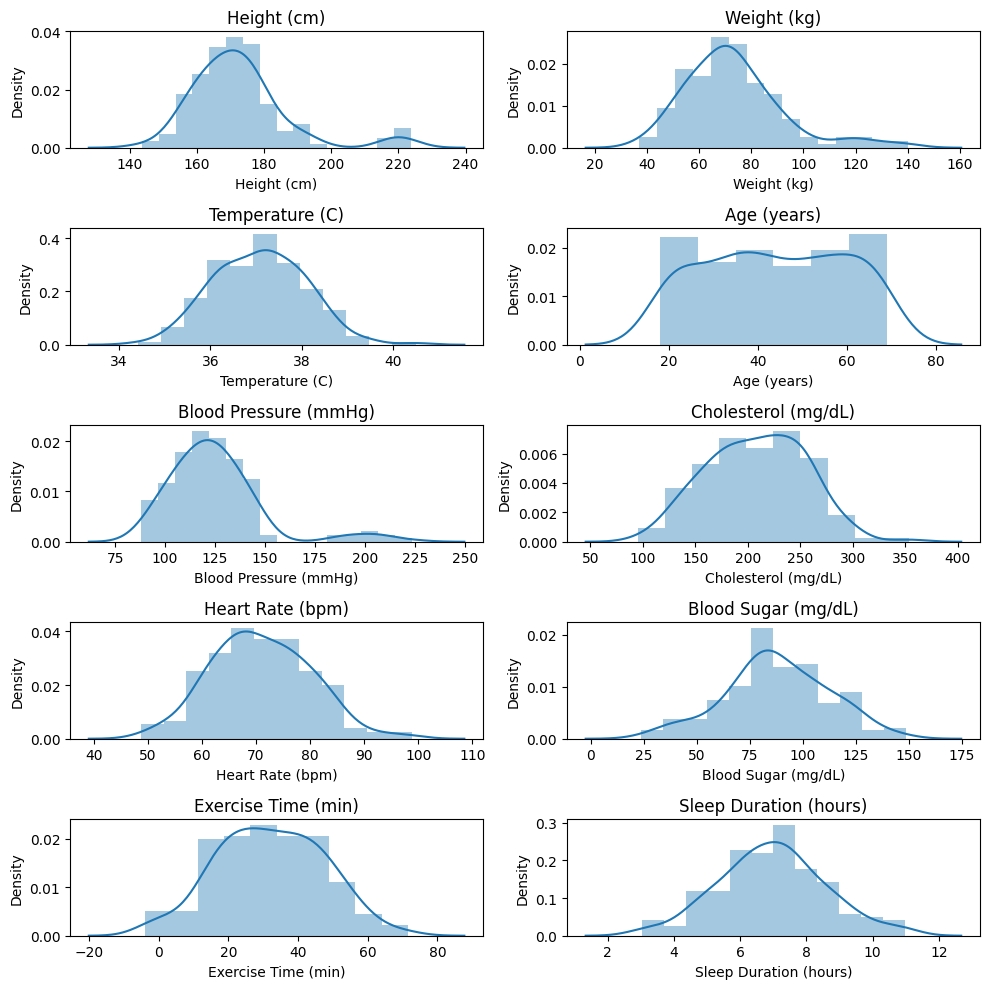

In [ ]:
# 1. Write a function to identify and handle missing values
# Let's check their distribution:

# subplot each distribution
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i, col in enumerate(df.columns[:10]):
    row = i // 2
    col_idx = i % 2
    sns.distplot(df[col], ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col)

plt.tight_layout()

In [ ]:
# From above distributions, all almost normal distribution (age has some issue so far), so I will fill null values with mean
# Check number of nulls
df.isna().sum()

,0
Height (cm),27
Weight (kg),29
Temperature (C),20
Age (years),20
Blood Pressure (mmHg),29
Cholesterol (mg/dL),30
Heart Rate (bpm),20
Blood Sugar (mg/dL),20
Exercise Time (min),20
Sleep Duration (hours),20


In [ ]:
# 1. Write a function to identify and handle missing values

def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    for col in missing_values[missing_values > 0].keys():
        # Handle missing values
        df[col] = df[col].fillna(df[col].mean())
    return df

df = handle_missing_values(df)
df.isna().sum()

,0
Height (cm),0
Weight (kg),0
Temperature (C),0
Age (years),0
Blood Pressure (mmHg),0
Cholesterol (mg/dL),0
Heart Rate (bpm),0
Blood Sugar (mg/dL),0
Exercise Time (min),0
Sleep Duration (hours),0


In [ ]:
# 3. Implement a function to detect and handle outliers using either the IQR method or Z-score.

def outlier_count(col, data):
    # Calculate Q1, Q3, and IQR
    q75, q25 = np.percentile(data[col], [75, 25])
    # calculate your inter quatile
    iqr = q75 - q25
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # Identify outliers using IQR
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {} %'.format(outlier_percent))

    return (outlier_count > 0, min_val, max_val)

def outlier_handle(col, data):
    cond, min_val, max_val = outlier_count(col, data)
    if cond:
    # # Capping outliers to the borders so that we wont remove them (not the best idea)
        data[col] = np.where(data[col] > max_val, max_val, data[col])
        data[col] = np.where(data[col] < min_val, min_val, data[col])

    return data

# Showing outliers
for col in df.columns[:10]:
    outlier_count(col, df)

# Handling outliers
for col in df.columns[:10]:
    df = outlier_handle(col, df)


---------------Height (cm)---------------

Number of outliers: 11
Percent of data that is outlier: 5.5 %

---------------Weight (kg)---------------

Number of outliers: 12
Percent of data that is outlier: 6.0 %

---------------Temperature (C)---------------

Number of outliers: 1
Percent of data that is outlier: 0.5 %

---------------Blood Pressure (mmHg)---------------

Number of outliers: 10
Percent of data that is outlier: 5.0 %

---------------Cholesterol (mg/dL)---------------

Number of outliers: 1
Percent of data that is outlier: 0.5 %

---------------Heart Rate (bpm)---------------

Number of outliers: 4
Percent of data that is outlier: 2.0 %

---------------Blood Sugar (mg/dL)---------------

Number of outliers: 8
Percent of data that is outlier: 4.0 %

---------------Exercise Time (min)---------------

Number of outliers: 1
Percent of data that is outlier: 0.5 %

---------------Sleep Duration (hours)---------------

Number of outliers: 9
Percent of data that is outlier: 4.5 

# **3. Data Augmentation for Class Imbalance (7 Marks)**

**Objective:** Handle the class imbalance in the target variable to ensure the model is trained on balanced data.

**Tasks:**

**1. Checking Class Distribution (2 Marks):**

* Write a function to check and display the distribution of the target variable. Explain why handling class imbalance is important in classification tasks.

**2.Balancing the Dataset (5 Marks):**

* Apply a data augmentation technique (e.g., SMOTE, oversampling, undersampling)
to balance the classes. Provide a justification for the method chosen.


Target
0    180
1     20
Name: count, dtype: int64


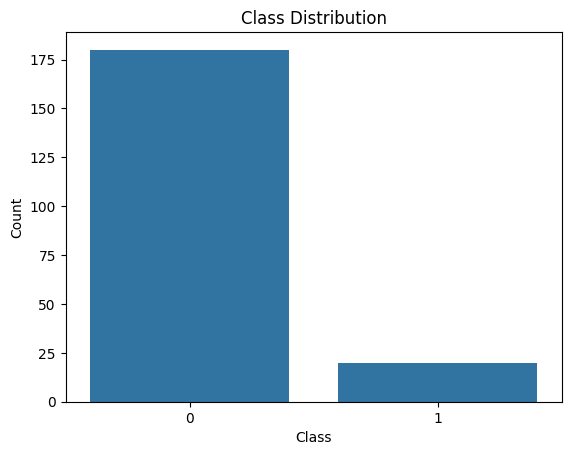

In [ ]:
# 1. Write a function to check and display the distribution of the target variable

def check_class_distribution(df):
    # Check class distribution
    class_counts = df['Target'].value_counts()
    print(class_counts)
    sns.barplot(class_counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

check_class_distribution(df)

# It is important to have same number of distribution in terms of per class
# Otherwise, model will be bias, and classify inaccurately - model should be thinking that both classes are equally distributed
# Class imbalance can severely impact the model's performance, leaving you with inaccurate predictions and wasted resources

In [ ]:
# 2. Apply a data augmentation technique

# Let's use SMOTE for class balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X = df.drop(['Target'], axis=1)
y = df['Target']
X_res, y_res = sm.fit_resample(X, y)

X_res.shape, y_res.shape

y_res.value_counts() # so we now balanced the classes using SMOTE offline method (should be using online since it performs better)
# But due to time limitation, going with that one

,count
Target,
0,180
1,180


# **4. Exploratory Data Analysis (EDA) (5 Marks)**
**Objective:** Gain insights into the dataset by visualizing the data and understanding relationships between features.

**Tasks:**

**1. Visualize Data Distribution (3 Marks):**

* Create visualizations (e.g., histograms, box plots) for at least two features to understand their distributions. Provide explanations for any patterns or anomalies.

**2.Correlation Analysis (2 Marks):**

* Compute and visualize a correlation matrix for the numerical features. Discuss any strong correlations observed and their potential impact on modeling.


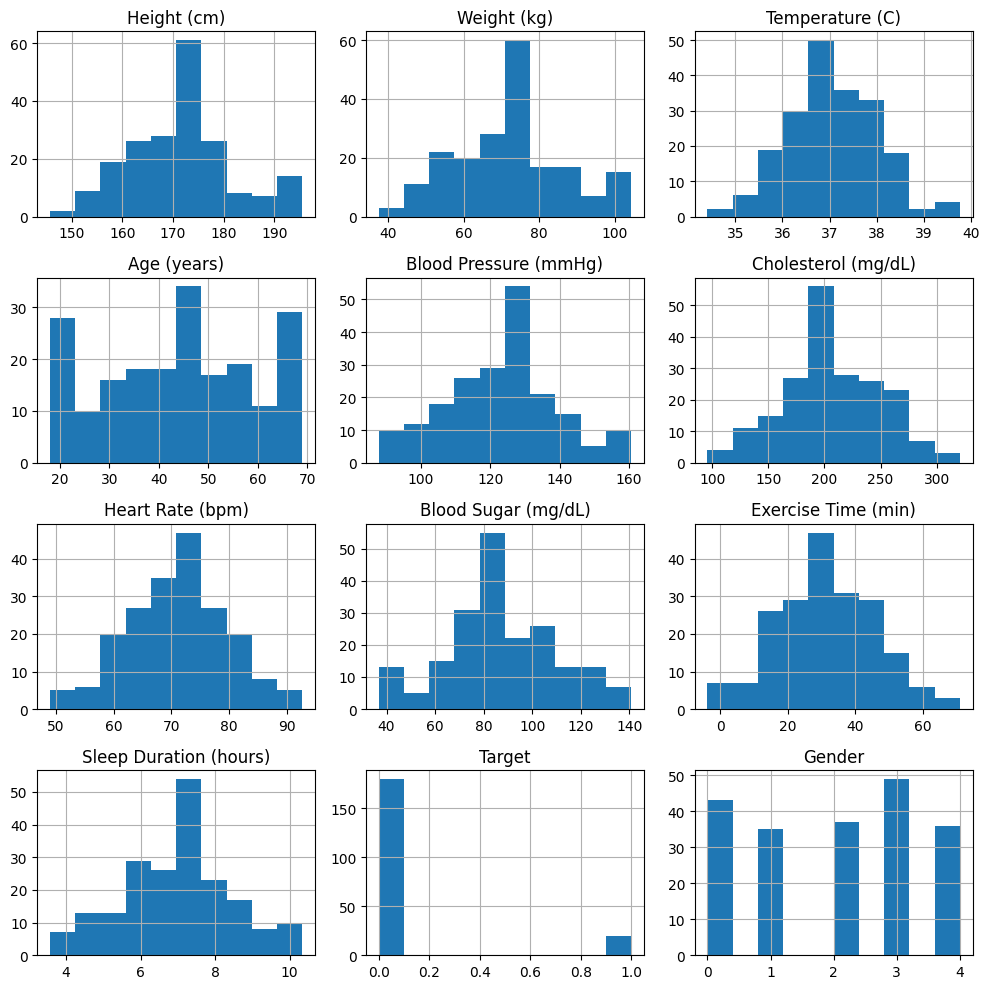

In [ ]:
# 1. Visualize Data Distribution
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

<Axes: ylabel='Height (cm)'>

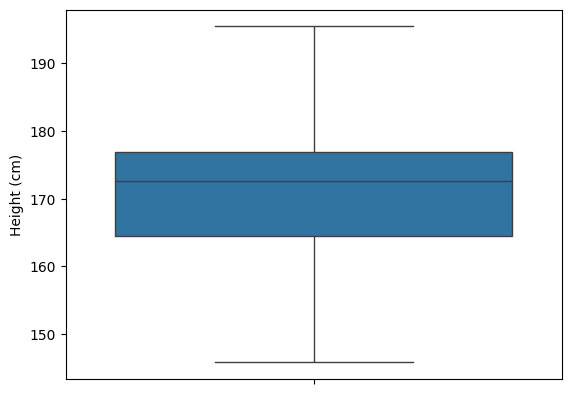

In [ ]:
sns.boxplot(df['Height (cm)'])

<Axes: ylabel='Weight (kg)'>

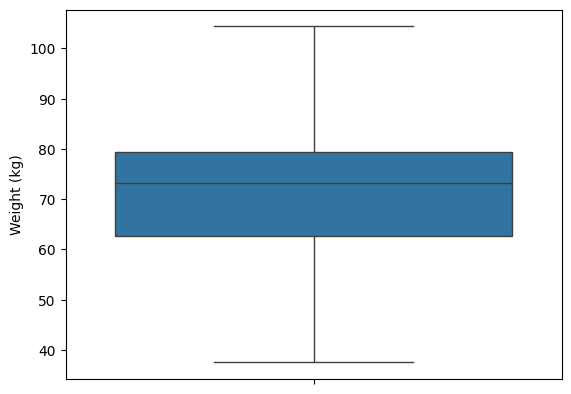

In [ ]:
sns.boxplot(df['Weight (kg)'])

<Axes: ylabel='Cholesterol (mg/dL)'>

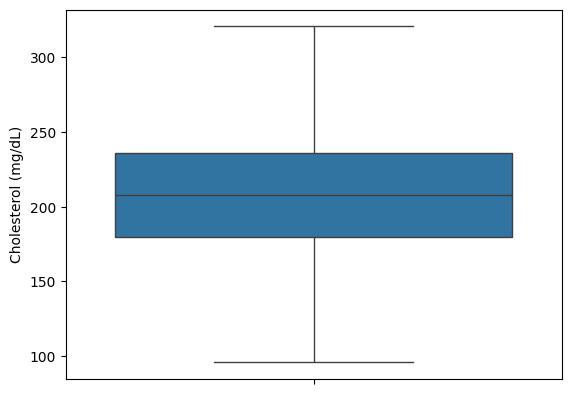

In [ ]:
sns.boxplot(df['Cholesterol (mg/dL)'])

Above I plotted distributions of the features I want to select for performing classification task

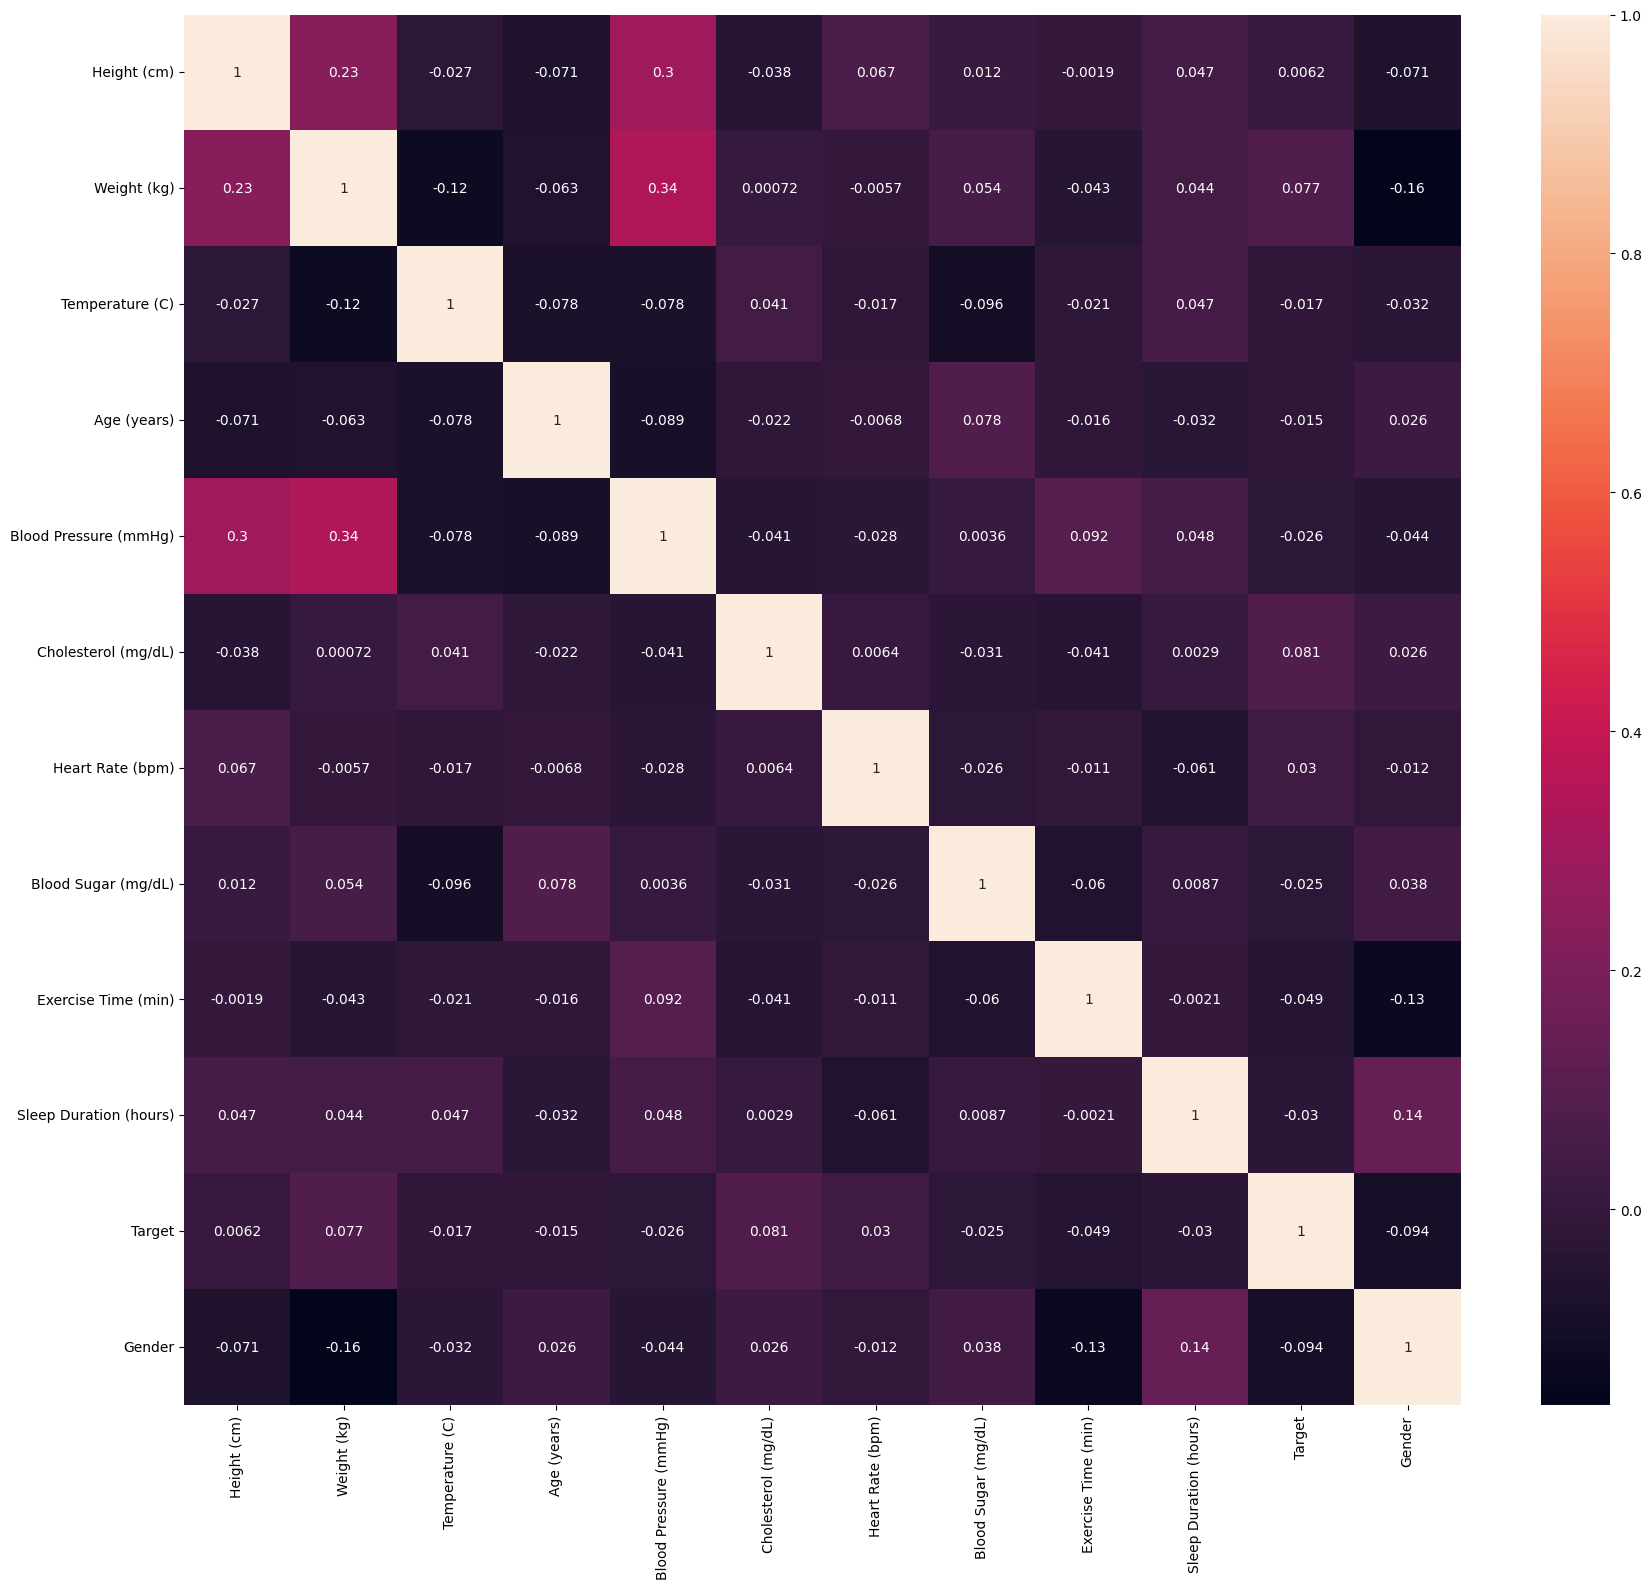

In [ ]:
# 2. Correlation matrix plotting
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.show()

# From correlation matrix we can see that our Target
# has almost no high correlation with any features
# But among which it has are: height, weight, cholesterol - will choose those as X later

# **5. Data Scaling and Train-Test Split (5 Marks)**

**Objective:** Prepare the dataset for modeling by scaling features and splitting it into training and testing sets.

**Tasks:**

**1. Scaling Features (3 Marks):**

* Implement a scaling technique (e.g., Min-Max scaling or Standardization) to ensure all features are on the same scale. Explain why scaling is important for machine learning algorithms. **(Code from Scratch)**

**2. Train-Test Split (2 Marks):**

* Split the dataset into training and testing sets (e.g., 80/20 or 70/30 split). Ensure that class ratios are maintained during the split.

In [ ]:
# 1. Implement a scaling technique from scratch
# Doing standardization from scratch
def standardization(x, mean, std):
    return (x - mean) / std

# Performing standardization only on features I am gonna use for training
for col in ['Height (cm)', 'Weight (kg)', 'Cholesterol (mg/dL)']:
    df[col] = standardization(df[col], df[col].mean(), df[col].std())

In [ ]:
X = df[['Height (cm)', 'Weight (kg)', 'Cholesterol (mg/dL)']]
y = df['Target']
X_res, y_res = sm.fit_resample(X, y)

X_res.shape, y_res.shape, y_res.value_counts()

((360, 3),
 (360,),
 Target
 0    180
 1    180
 Name: count, dtype: int64)

In [ ]:
# 2. Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)

# **6. Model Building and Evaluation (10 Marks)**
**Objective:** Build and evaluate multiple classification models using different algorithms.

**Tasks:**

**1.Build and Train Multiple Models (6 Marks):**

* Train at least two classification models (e.g., Logistic Regression, Random Forest, SVM). Compare their performance on the test set using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

**2. Model Comparison (4 Marks):**

* Create a summary table comparing the performance of the models. Explain which model performed the best and why, based on the metrics used.


In [ ]:
# 1. Build and Train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# 2. Model comparison
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.9230769230769231
Random Forest Accuracy: 0.9230769230769231
SVM Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.00      0.00      0.00         2

    accuracy                           0.92        26
   macro avg       0.46      0.50      0.48        26
weighted avg       0.85      0.92      0.89        26

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.00      0.00      0.00         2

    accuracy                           0.92        26
   macro avg       0.46      0.50      0.48        26
weighted avg       0.85      0.92      0.89        26

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.00      0.00      0.00         2

    accuracy                           0.92        26
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# **7. Cross-Validation and Hyperparameter Tuning (10 Marks)**

**Objective:** Improve the performance of your models using cross-validation and hyperparameter tuning.

**Tasks:**

**1. Cross-Validation (5 Marks):**

* Implement k-fold cross-validation (k=5) for the models and report the average performance metrics. Explain how cross-validation improves model evaluation.

**2. Grid Search for Hyperparameter Tuning (5 Marks):**

* Use grid search to tune hyperparameters of one model (e.g., SVM, Random Forest). Provide the best hyperparameters and explain how they improved the model performance.

In [ ]:
# 1. Perform Cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
models = [lr, svm, rf]
for i, model in enumerate(models):
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # Common scoring metric for regression
    print([i], " : ", " scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())

[0]  :   scores:  [-0.08571429 -0.11428571 -0.05714286 -0.14285714 -0.11764706] - Scores mean:  -0.1035294117647059 - Scores std (lower better):  0.029430486238450463
[1]  :   scores:  [-0.08571429 -0.11428571 -0.05714286 -0.14285714 -0.11764706] - Scores mean:  -0.1035294117647059 - Scores std (lower better):  0.029430486238450463
[2]  :   scores:  [-0.08571429 -0.14285714 -0.08571429 -0.14285714 -0.11764706] - Scores mean:  -0.1149579831932773 - Scores std (lower better):  0.025590408484940205


In [ ]:
# 2. Grid search
from sklearn.model_selection import cross_val_score, GridSearchCV

rf = RandomForestClassifier(random_state=52)

param_grid = {
 'bootstrap': [True],
 'max_depth': [5, 10],
 'n_estimators': [5, 6, 7]
}

grid = GridSearchCV(rf, param_grid, scoring="neg_mean_squared_error",
cv=kfold, refit=True, return_train_score=True)
# Fit the grid, performing cross-validation across all combinations
grid.fit(X_train, y_train)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.00      0.00      0.00         2

    accuracy                           0.92        26
   macro avg       0.46      0.50      0.48        26
weighted avg       0.85      0.92      0.89        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 6}

# **8. Final Model Evaluation and Error Analysis (3 Marks)**
Objective: Evaluate the final model’s performance and identify areas for improvement.

**Tasks:**

**1. Confusion Matrix and Error Analysis (3 Marks):**

**NOTE: Code Confusion Matrix From Scratch**

* Create a confusion matrix for the best-performing model and analyze where it makes errors (e.g., False Positives, False Negatives). Suggest ways to reduce these errors in future iterations.

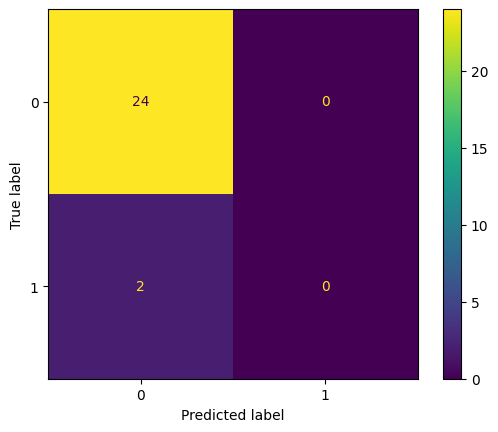

In [ ]:
# 1. Confusion Matrix from scratch

# def confusion_matrix(true, pred):
#   classes = set(true + pred)
#   nc = 2
#   shape = (nc, nc)
#   mat = np.zeros(shape)
#   n = max(len(true),len(pred))
#   for i in range(nc):
#     for j in range(nc):
#       for k in range(n):
#         if true[k]-1 == i:
#           if pred[k]-1 == j:
#             mat[i][j] = mat[i][j] + 1
#   return mat

# confusion_matrix(y_test, y_pred_rf)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Bonus Task (Optional - 5 Marks)**

**Feature Importance (5 Marks):**

* For models like Random Forest, calculate the feature importance scores and visualize them. Discuss which features are the most influential for classification and how this information can be used to improve the model.


[0.3095994  0.35885701 0.3315436 ]


<BarContainer object of 3 artists>

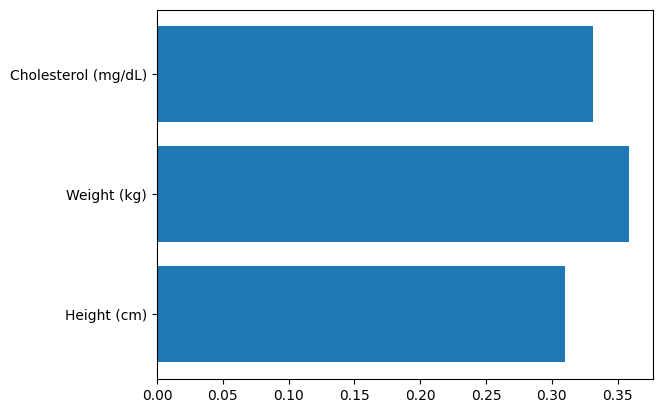

In [ ]:
# 2. Feature importance
rf = grid.best_estimator_
print(rf.feature_importances_)
plt.barh(X_train.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

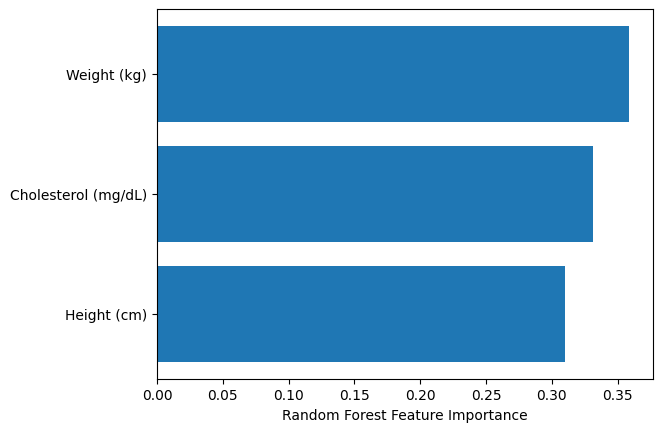

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**Deliverables:**
* **Cleaned Dataset:**Submit the cleaned version of the dataset.
* **Code/Notebook:** Provide a notebook with all steps completed, including EDA, data preprocessing, model building, and tuning.
* **Report:** Write a short report summarizing the findings, including:
Key steps taken in data cleaning and preprocessing
Insights from the EDA
Comparison of models and metrics.
The final model selected and its performance.

# Final thoughts:
1. The model performance on three features is not enough, need to select more features (the feature importance graphics shows that all features are almost equally important)
2. The performance of random forest is always good for tabular data - as it is shown based on results obtained
3. Could not implement confusion matrix on time (running out of time) - so used sklearn one.
4. I thought task was manageble on time, but seems like I was wrong :)